#Assessment 3
###Name - Dhwaj Jain
###Reg No.- 20BCI0302

In [3]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix,accuracy_score
dataset=pd.DataFrame(pd.read_csv('Housing.csv'))

In [4]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


In [5]:
dataset.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,unfurnished


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


mainroad  77
yes  468
Survival Rate:  0.14 :1


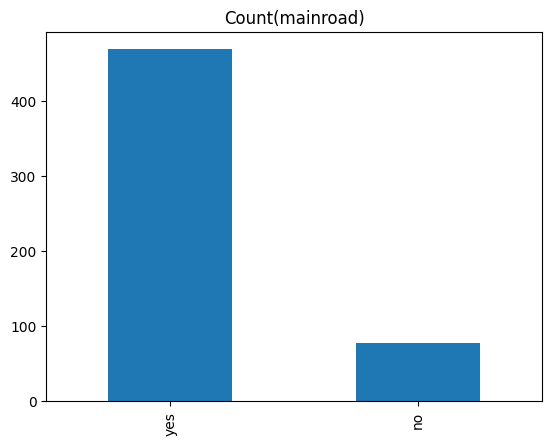

In [7]:
#Data Visualization
#Univariate Analysis
##BAR PLOT FOR MAINROAD
targ_cnt=dataset.mainroad.value_counts()
print('mainroad ',targ_cnt[1])
print('yes ',targ_cnt[0])
print('Survival Rate: ',round(targ_cnt[1]/(targ_cnt[0]+targ_cnt[1]),2),':1')
targ_cnt.plot(kind='bar',title='Count(mainroad)')
plt.show()

SEMIFURNISHED  227
UNFURNISHED 178
FURNISHED  140
Survival Rate:  0.44 :1


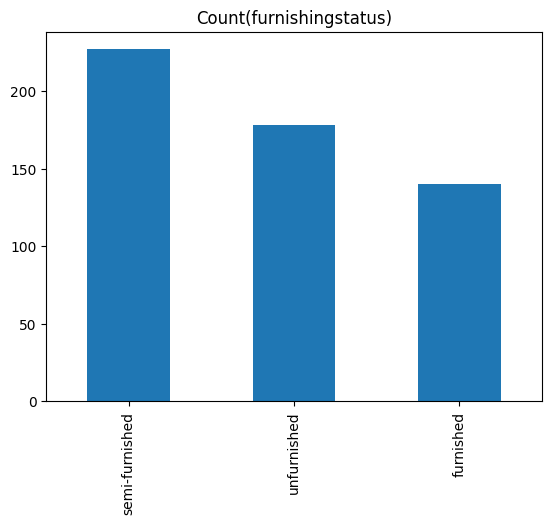

In [8]:
##BAR PLOT FOR FURNISHING STATUS
targ_cnt=dataset.furnishingstatus.value_counts()
print('SEMIFURNISHED ',targ_cnt[0])
print('UNFURNISHED',targ_cnt[1])
print('FURNISHED ',targ_cnt[2])
print('Survival Rate: ',round(targ_cnt[1]/(targ_cnt[0]+targ_cnt[1]),2),':1')
targ_cnt.plot(kind='bar',title='Count(furnishingstatus)')
plt.show()

<Axes: xlabel='area', ylabel='Count'>

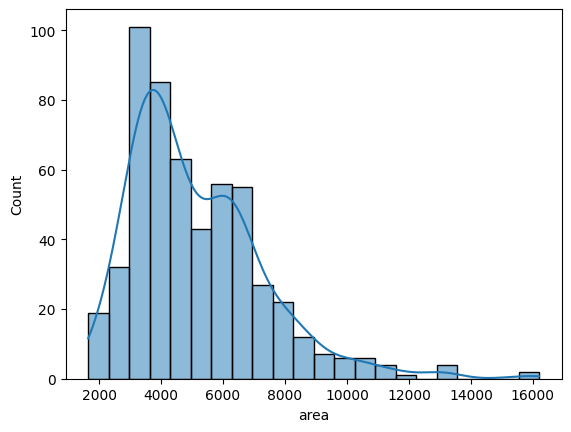

In [9]:
#histogram for AREA
sns.histplot(dataset.area,kde=True)

<Axes: xlabel='price', ylabel='Count'>

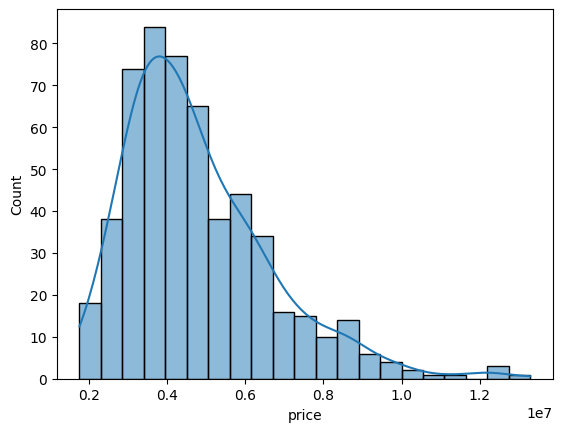

In [10]:
#histogram for PRICE
sns.histplot(dataset.price,kde=True)

<Axes: ylabel='count'>

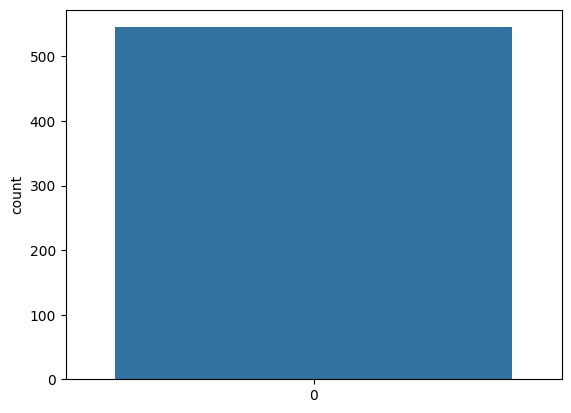

In [11]:
#countplot for various attributes
sns.countplot(dataset.bedrooms)

<Axes: ylabel='count'>

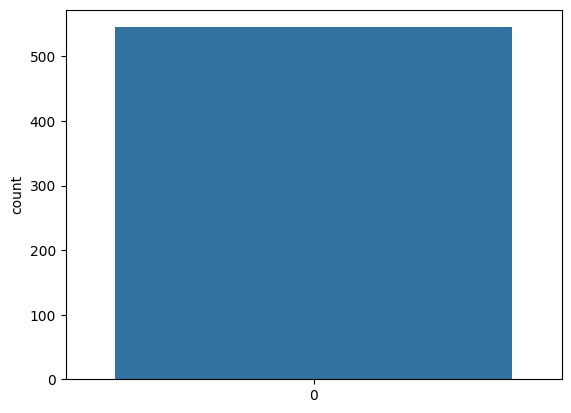

In [12]:
sns.countplot(dataset.bathrooms)

<Axes: ylabel='count'>

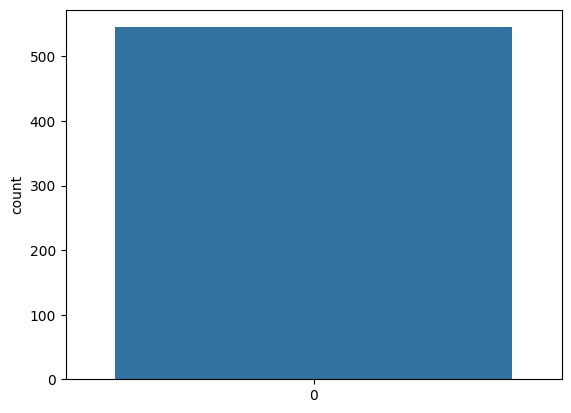

In [13]:
sns.countplot(dataset.stories)

In [14]:
#Bivariate Analysis
#finding correlation among numerical data
dataset[['price','area']].corr()

,price,area
price,1.000000,0.535997
area,0.535997,1.000000


In [15]:
dataset[['bedrooms','bathrooms','stories','parking']].corr()

,bedrooms,bathrooms,stories,parking
bedrooms,1.000000,0.373930,0.408564,0.139270
bathrooms,0.373930,1.000000,0.326165,0.177496
stories,0.408564,0.326165,1.000000,0.045547
parking,0.139270,0.177496,0.045547,1.000000


(0.0, 10000.0)

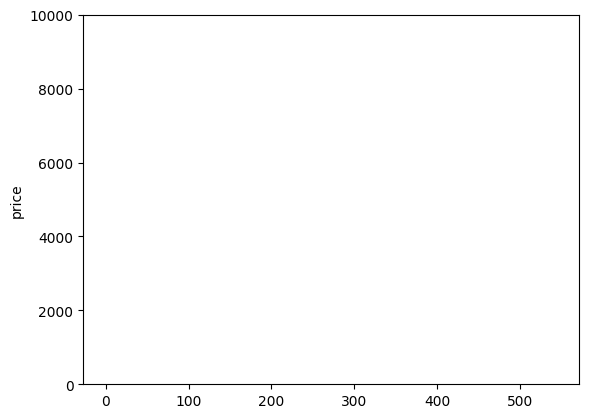

In [18]:
#scatterplot between price and area
sns.scatterplot(dataset.price)
plt.ylim(0,10000)

In [19]:
#bi-variate analysis between one categorical and other numerical data
#mainroad
dataset.groupby(by="mainroad").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]

<ipython-input-19-8b99eb50128c>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(by="mainroad").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]


,price,area,bedrooms,bathrooms,stories,parking
mainroad,,,,,,
no,3.398905e+06,3606.441558,2.987013,1.233766,1.545455,0.259740
yes,4.991777e+06,5404.591880,2.961538,1.294872,1.848291,0.764957


In [20]:
#guestroom
dataset.groupby(by="guestroom").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]

<ipython-input-20-a58d5754ecc4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(by="guestroom").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]


,price,area,bedrooms,bathrooms,stories,parking
guestroom,,,,,,
no,4.544546e+06,5009.000000,2.937500,1.256696,1.787946,0.678571
yes,5.792897e+06,5804.257732,3.092784,1.422680,1.886598,0.762887


In [21]:
#basement
dataset.groupby(by="basement").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]

<ipython-input-21-daae63fdd4d2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(by="basement").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]


,price,area,bedrooms,bathrooms,stories,parking
basement,,,,,,
no,4.509966e+06,5075.025424,2.912429,1.248588,1.915254,0.661017
yes,5.242615e+06,5290.502618,3.062827,1.356021,1.602094,0.753927


In [22]:
#hotwaterheating
dataset.groupby(by="hotwaterheating").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]

<ipython-input-22-3f32ce7d45a2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(by="hotwaterheating").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]


,price,area,bedrooms,bathrooms,stories,parking
hotwaterheating,,,,,,
no,4.728593e+06,5154.928846,2.957692,1.278846,1.801923,0.680769
yes,5.559960e+06,5059.280000,3.120000,1.440000,1.880000,0.960000


In [23]:
#airconditioning
dataset.groupby(by="airconditioning").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]

<ipython-input-23-8cec65f8d3b6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby(by="airconditioning").agg("mean")[['price','area','bedrooms','bathrooms','stories','parking']]


,price,area,bedrooms,bathrooms,stories,parking
airconditioning,,,,,,
no,4.191940e+06,4823.109920,2.884718,1.222520,1.632708,0.600536
yes,6.013221e+06,5860.610465,3.139535,1.424419,2.180233,0.895349


<Axes: xlabel='area', ylabel='Density'>

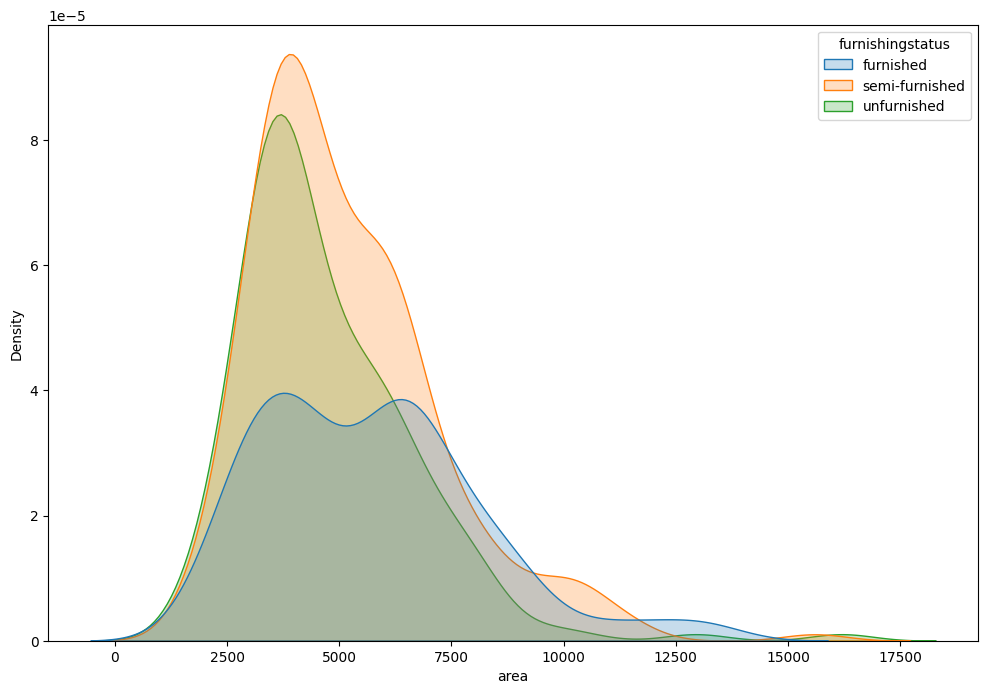

In [25]:
#kdeplot visualization for all numerical attributes with target attribute
plt.figure(figsize=(12,8))
sns.kdeplot(data=dataset, x= 'area',hue='furnishingstatus',fill=True)

<Axes: xlabel='price', ylabel='Density'>

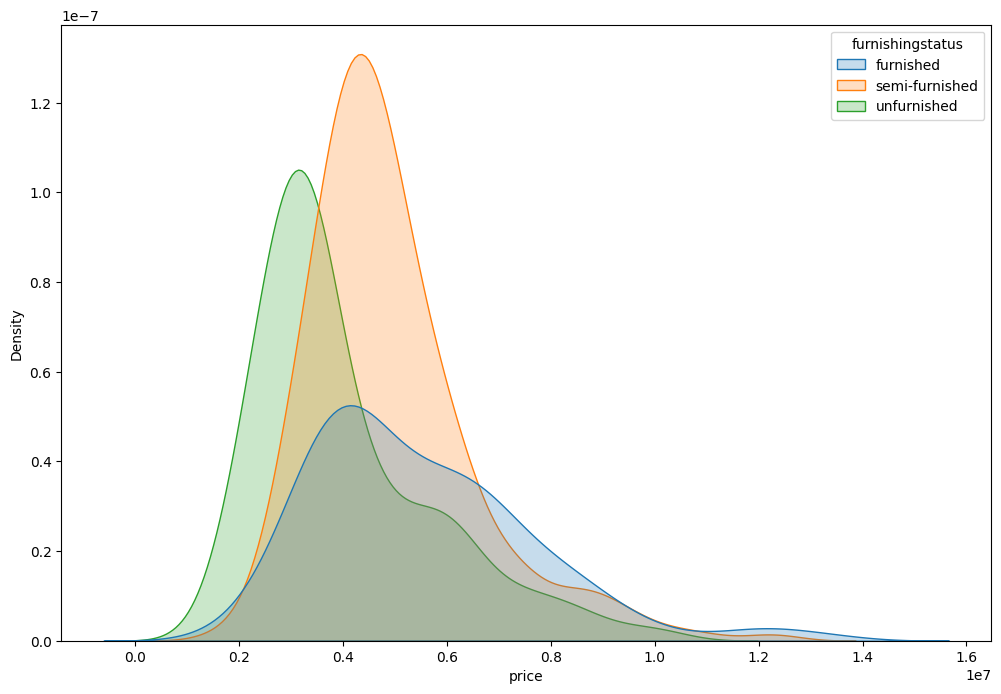

In [26]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=dataset, x= 'price',hue='furnishingstatus',fill=True)

<Axes: xlabel='bedrooms', ylabel='Density'>

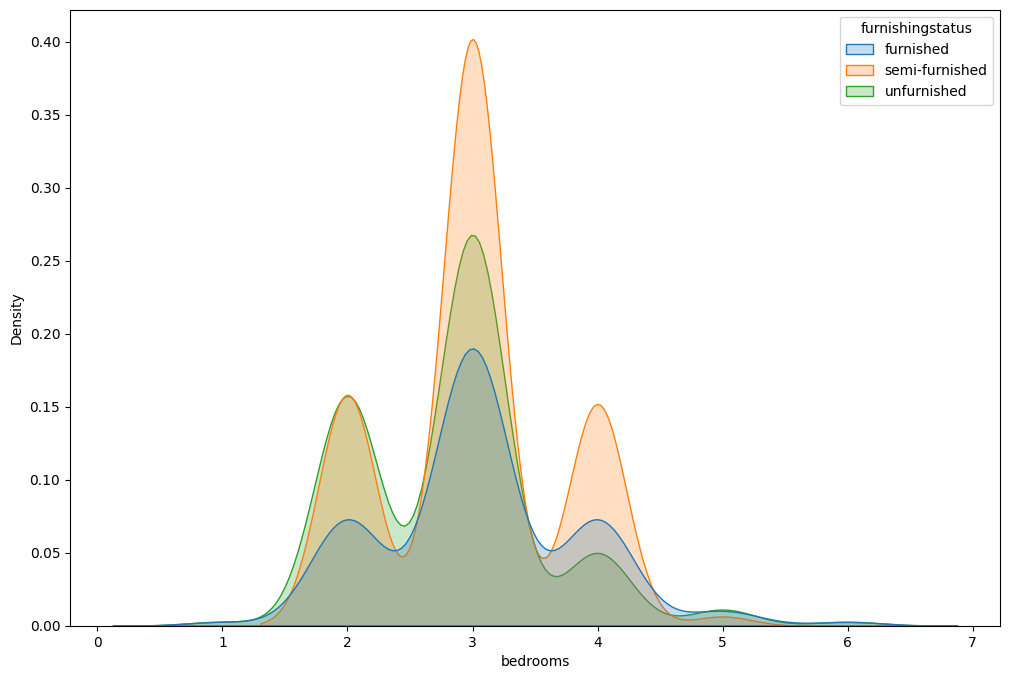

In [27]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=dataset, x= 'bedrooms',hue='furnishingstatus',fill=True)

<Axes: xlabel='bathrooms', ylabel='Density'>

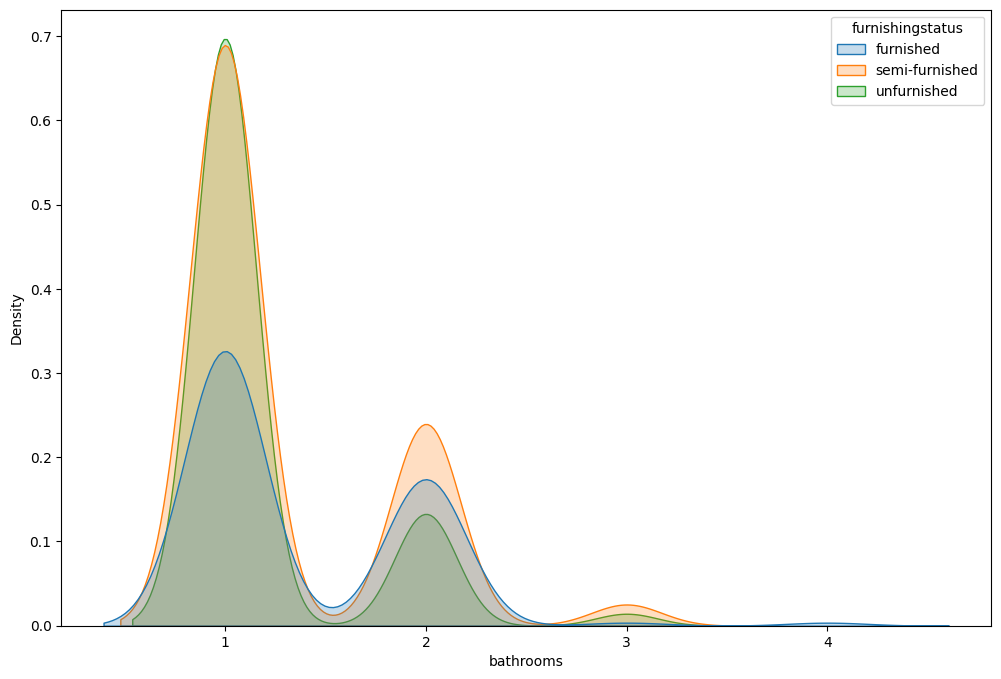

In [28]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=dataset, x= 'bathrooms',hue='furnishingstatus',fill=True)

<Axes: xlabel='stories', ylabel='Density'>

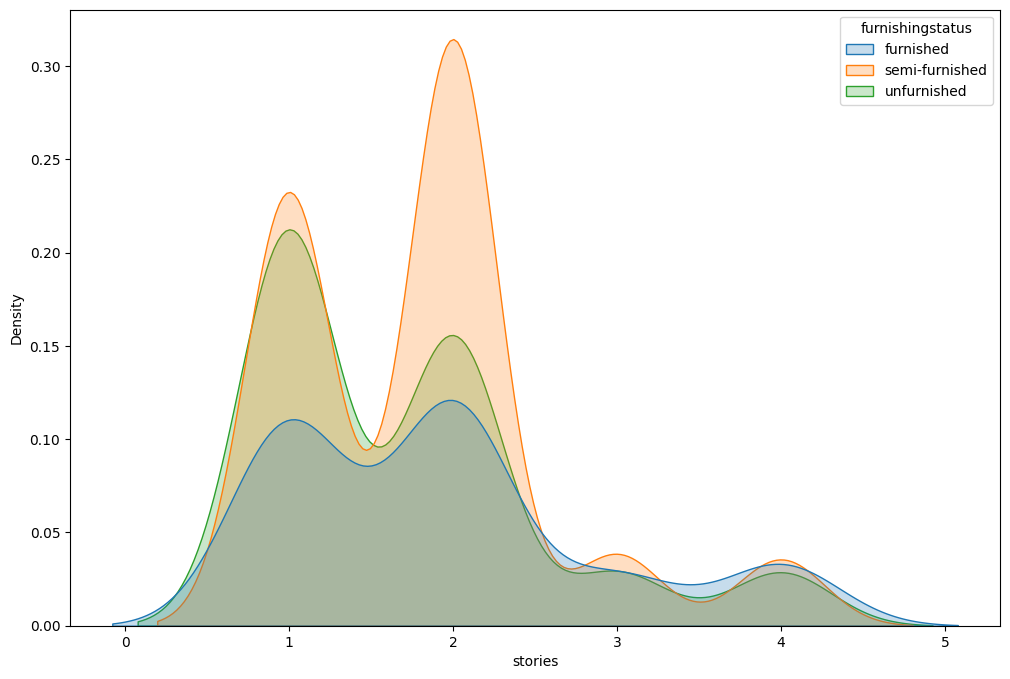

In [29]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=dataset, x= 'stories',hue='furnishingstatus',fill=True)

<AxesSubplot:xlabel='parking', ylabel='Density'>

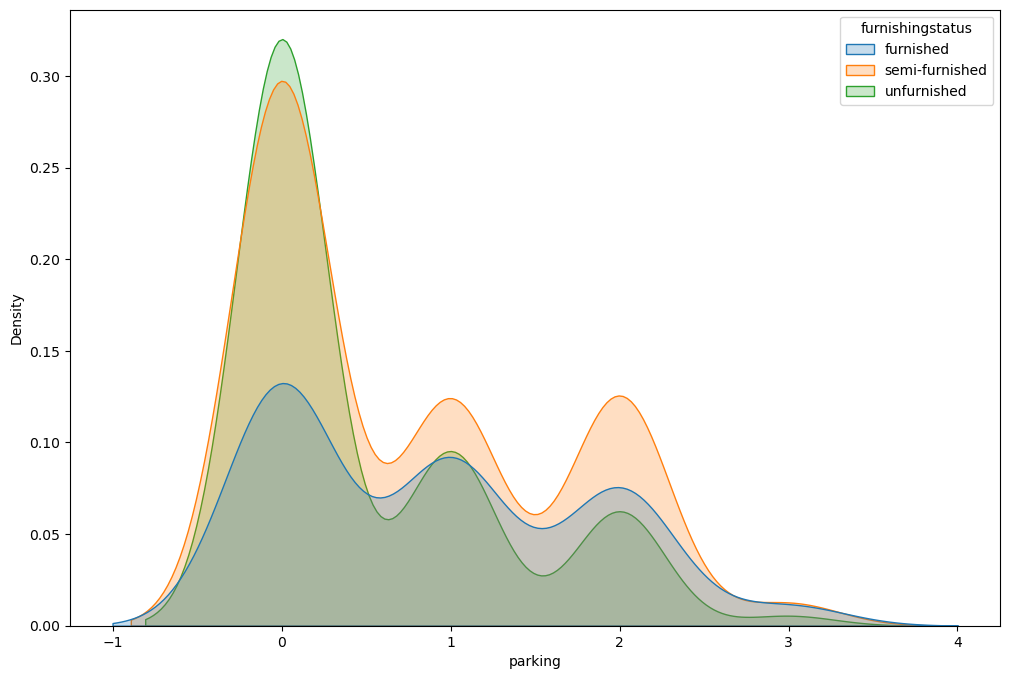

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=dataset, x= 'parking',hue='furnishingstatus',fill=True)

In [ ]:
#MULTIVARIATE
#pairplot
#sns.pairplot(data=dataset[['price','area','bedrooms','bathrooms','stories','parking']],hue='furnishingstatus')

<ipython-input-30-e091cc9576ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

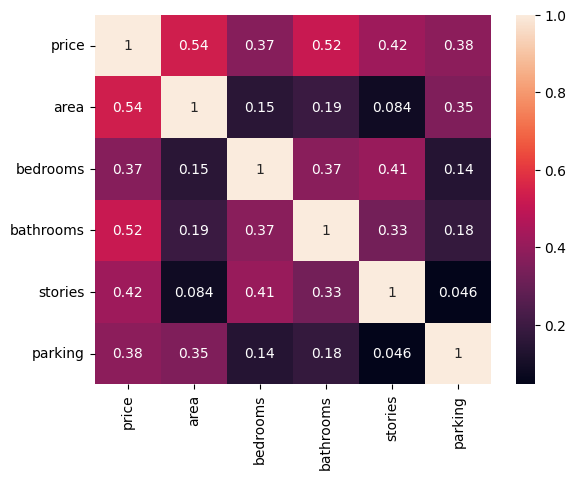

In [30]:
#heatmap
sns.heatmap(dataset.corr(), annot=True)

In [31]:
#DESCRIBE
df=dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [32]:
pd.get_dummies(df)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,1,0,0,1,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,0,1,1,0,1,0,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,0,1,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,0,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,0,1,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [33]:
np.mean(df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


price        4.766729e+06
area         5.150541e+03
bedrooms     2.965138e+00
bathrooms    1.286239e+00
stories      1.805505e+00
parking      6.935780e-01
dtype: float64

In [34]:
df.median()

<ipython-input-34-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [35]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)
print("\n No Missing Values \n")




Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

 No Missing Values 



In [37]:

# Find outliers
def find_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Replace outliers
def replace_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = np.where((column < lower_bound) | (column > upper_bound), column.median(), column)
    return column

# Specify the columns with numerical variables for outlier detection and replacement
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Find and replace outliers for each numerical column
for column in numerical_columns:
    outliers = find_outliers(df[column])
    print("Outliers in", column, ":\n", outliers)

    df[column] = replace_outliers(df[column])

# Check if outliers have been replaced
for column in numerical_columns:
    outliers = find_outliers(df[column])
    print("Outliers in", column, "after replacement:\n", outliers)

# Continue with the processed data (with replaced outliers)
processed_df = df

Outliers in price :
 0     13300000
1     12250000
2     12250000
3     12215000
4     11410000
5     10850000
6     10150000
7     10150000
8      9870000
9      9800000
10     9800000
11     9681000
12     9310000
13     9240000
14     9240000
Name: price, dtype: int64
Outliers in area :
 7      16200
10     13200
56     11440
64     11175
66     13200
69     12090
125    15600
129    11460
186    11410
191    10700
211    12900
403    12944
Name: area, dtype: int64
Outliers in bedrooms :
 7      5
28     5
34     5
89     5
112    6
143    5
152    5
271    5
340    5
356    5
395    6
536    5
Name: bedrooms, dtype: int64
Outliers in bathrooms :
 1    4
Name: bathrooms, dtype: int64
Outliers in stories :
 1      4
6      4
9      4
17     4
26     4
30     4
31     4
35     4
37     4
38     4
39     4
41     4
42     4
43     4
44     4
46     4
47     4
50     4
51     4
52     4
53     4
57     4
58     4
59     4
71     4
72     4
73     4
83     4
92     4
94     4
102    4
10

In [38]:
# Check for categorical columns
categorical_cols = processed_df.select_dtypes(include=['object']).columns.tolist()

# Perform encoding using one-hot encoding
encoded_df = pd.get_dummies(processed_df, columns=categorical_cols)

# Print the encoded DataFrame
print(encoded_df)

         price    area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0    4340000.0  7420.0       4.0        2.0      3.0      2.0            0   
1    4340000.0  8960.0       4.0        1.0      2.0      0.0            0   
2    4340000.0  9960.0       3.0        2.0      2.0      2.0            0   
3    4340000.0  7500.0       4.0        2.0      2.0      0.0            0   
4    4340000.0  7420.0       4.0        1.0      2.0      2.0            0   
..         ...     ...       ...        ...      ...      ...          ...   
540  1820000.0  3000.0       2.0        1.0      1.0      2.0            0   
541  1767150.0  2400.0       3.0        1.0      1.0      0.0            1   
542  1750000.0  3620.0       2.0        1.0      1.0      0.0            0   
543  1750000.0  2910.0       3.0        1.0      1.0      0.0            1   
544  1750000.0  3850.0       3.0        1.0      2.0      0.0            0   

     mainroad_yes  guestroom_no  guestroom_yes  basement_no  ba

In [39]:
# Splitting the data into dependent (target) variable and independent (feature) variables
X = encoded_df.drop('price', axis=1)  # Independent variables
y = encoded_df['price']  # Dependent variable

# Printing the independent and dependent variable dataframes
print("Independent Variables (Features):\n", X)
print("\nDependent Variable (Price):\n", y)

Independent Variables (Features):
        area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0    7420.0       4.0        2.0      3.0      2.0            0             1   
1    8960.0       4.0        1.0      2.0      0.0            0             1   
2    9960.0       3.0        2.0      2.0      2.0            0             1   
3    7500.0       4.0        2.0      2.0      0.0            0             1   
4    7420.0       4.0        1.0      2.0      2.0            0             1   
..      ...       ...        ...      ...      ...          ...           ...   
540  3000.0       2.0        1.0      1.0      2.0            0             1   
541  2400.0       3.0        1.0      1.0      0.0            1             0   
542  3620.0       2.0        1.0      1.0      0.0            0             1   
543  2910.0       3.0        1.0      1.0      0.0            1             0   
544  3850.0       3.0        1.0      2.0      0.0            0           

In [40]:
# Select the independent variables columns
independent_vars = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
                      'basement', 'hotwaterheating', 'airconditioning', 'parking','furnishingstatus']]

# Convert categorical variables to one-hot encoding
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','furnishingstatus']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = pd.DataFrame(encoder.fit_transform(independent_vars[categorical_vars]))

# Concatenate encoded categorical variables with the remaining numeric variables
numeric_vars = independent_vars.drop(columns=categorical_vars)
scaled_df = pd.concat([numeric_vars, encoded_categorical], axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the independent variables
scaled_vars = scaler.fit_transform(scaled_df)

# Convert the scaled variables array back to a DataFrame
scaled_df = pd.DataFrame(scaled_vars, columns=scaled_df.columns)

# Print the scaled data
print(scaled_df)

scaled_df['price']=df['price']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


TypeError: ignored

In [41]:
# Split the data into dependent and independent variables
X = scaled_df.drop('price', axis=1)  # Independent variables (features)
y = scaled_df['price']  # Dependent variable (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

KeyError: ignored

In [42]:
model = LinearRegression()



In [43]:
scaled_df.head()

,area,bedrooms,bathrooms,stories,parking,0,1,2,3,4,5,6
0,7420.0,4.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8960.0,4.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,9960.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,7500.0,4.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,7420.0,4.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [44]:
# Step 12: Train the Model
model.fit(X_train, y_train)

NameError: ignored

In [ ]:
# Step 13: Test the Model
y_pred = model.predict(X_test)

C:\Users\Yoga 6\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1505585445043.871


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1505585445043.871
Mean Absolute Error (MAE): 944620.1221977018
Root Mean Squared Error (RMSE): 1227023.0010247857
R-squared (R2) Score: 0.4704364397336237


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

C:\Users\Yoga 6\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Mean Squared Error (MSE): 1375511118505.8513
Mean Absolute Error (MAE): 897675.0719512196
Root Mean Squared Error (RMSE): 1172821.8613693435
R-squared (R2) Score: 0.5161878274661995


C:\Users\Yoga 6\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
